# **Librerias**

In [1]:
# Importamos 

import scipy
import matplotlib
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'CVXpy Version: {cp.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
CVXpy Version: 1.6.5
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Problemas de Optimizacion** 

Encontramos la **variable de optimizacion** $x$ que **minimiza** $f_{0}(x)$ dentro de todo el conjunto de $x$ que satisafecen las funciones de **restricciones de desigualdad** $f_{i}: \mathbb{R}^n \rightarrow \mathbb{R}$ y las funciones de **restricciones de igualdad** $h_{i}: \mathbb{R}^n \rightarrow \mathbb{R}$

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

El **dominio** del problema de optimizacion, se define como el **conjunto de puntos** en donde tanto la **funcion objetivo** como las **funciones de restricciones e igualdad** estan definidas

$$\operatorname{D} = \operatorname{dom} f_{0} \hspace{0.1cm} \bigcap_{i=1}^m \hspace{0.1cm} \operatorname{dom} f_{i} \hspace{0.1cm} \bigcap_{i=1}^p \hspace{0.1cm} \operatorname{dom} h_{i}$$

* Si existe al menos un punto $x \in \operatorname{D}$ el problema es **factible**, a su vez el **conjunto factible** son todos los puntos que pertencen al **dominio** $\operatorname{D}$

El **valor optimo** $p^{\star}$ del problema de optimizacion es el **infimo** del **conjunto factible** 

$$p^{\star} = \text{inf}\{f_{0}(x) \mid f_i(x) \leq 0, \hspace{0.1cm} i = 1, 2, \dots, m, \hspace{0.1cm} h_i(x) = 0, \hspace{0.1cm} i = 1, 2, \dots, p\}$$

* $p^{\star}$ puede tomar **valores extendidos** $\pm \infty$, si el problema **no es factible** $p^{\star} = \infty$, si el problema no tiene **limite inferior** $p^{\star} = -\infty$

El **punto optimo** $x^{\star}$, es un punto que es **factible** y ademas su imagen es un **valor optimo** $f_{0}(x^{\star}) = p^{\star}$, el **conjunto de puntos optimos** se define como: 

$$X_{\text{opt}} = \{x \mid f_i(x) \leq 0, \hspace{0.1cm} i = 1, 2, \dots, m, \hspace{0.1cm} h_i(x) = 0, \hspace{0.1cm} i = 1, 2, \dots, p, \hspace{0.1cm} f_{0}(x) = p^{\star} \}$$

Un **problema de factibilidad** determina si las **restricciones de desigualdad e igualdad** son consistentes y si existe algun **punto** que los satisfaga

$$\begin{align*}
\text{encontrar} \quad & x \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$


**Nota:** $f_{0}: \mathbb{R}^n \rightarrow \mathbb{R}$ es la funcion **objetivo** o la funcion de **costos**

### **Problema #1**

$$\begin{align*}
\text{minimizar} \quad & (x_{1}-2)^2 + (x_{2} - 1)^2 + x_{1}^2 \\ \text{sujeto a} \quad & x_{1} + x_{2} - 2 \leq 0 \\ & -x_{1} \leq 0 \\ &  -x_{2} \leq 0 
\end{align*}$$

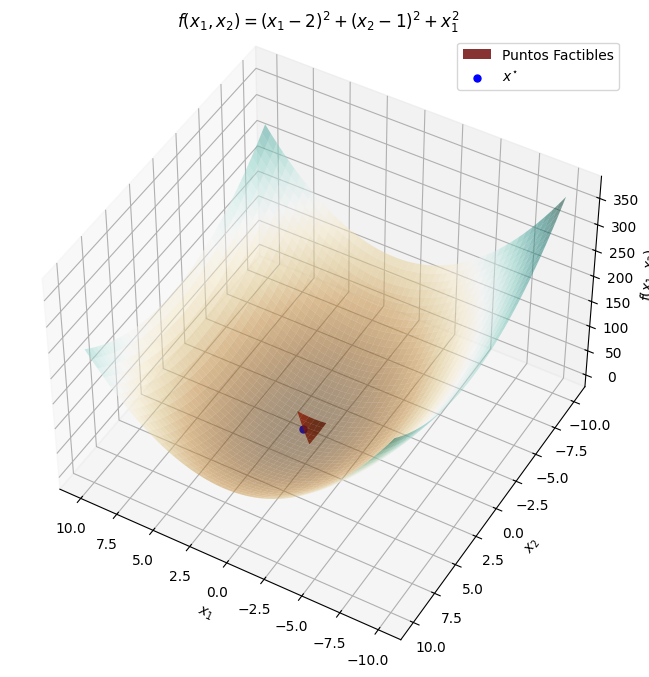

In [2]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + (x2 - 1)**2 + x1**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 2 <= 0, -x1 <= 0, -x2 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles 

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = (X - 2)**2 + (Y - 1)**2 + X**2

feasible = (X + Y - 2 <= 0) & (-X <= 0) & (-Y <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 2)^2 + (x_{2} - 1)^2 + x_{1}^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema #2**

$$\begin{align*}
\text{minimizar} \quad & e^{x_{1}} + x_{2}^2 \\ \text{sujeto a} \quad & x_{1} + x_{2} - 1.5 \leq 0 \\ & -x_{1} \leq 0 \\ &  -x_{2} \leq 0 
\end{align*}$$

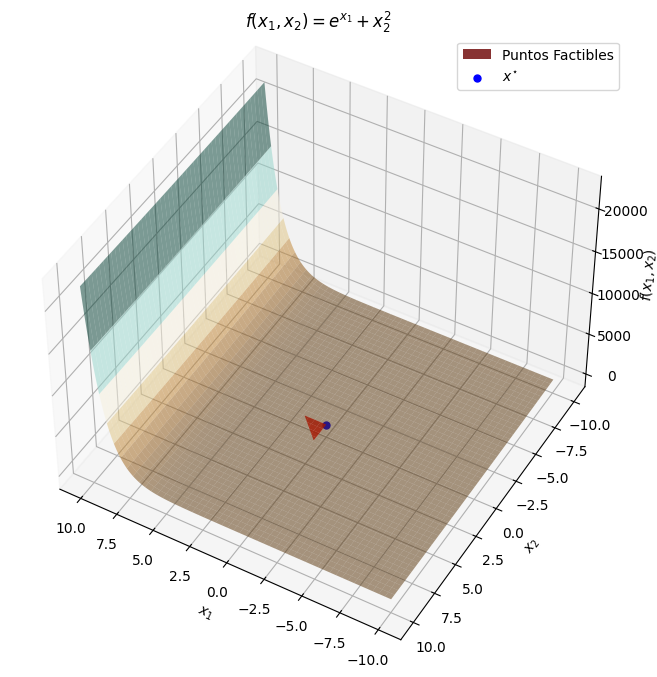

In [3]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(cp.exp(x1) + x2**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 1.5 <= 0, -x1 <= 0, -x2 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles 

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = np.exp(X) + Y**2

feasible = (X + Y - 1.5 <= 0) & (-X <= 0) & (-Y <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = e^{x_{1}} + x_{2}^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema #3**

$$\begin{align*}
\text{minimizar} \quad & x_1^2 - \log(x_2 + 3)\\ \text{sujeto a} \quad & x_1 + 2x_2 - 2 \leq 0 \\ & -x_1 \leq 0 \\ &  -x_2 \leq 0 
\end{align*}$$

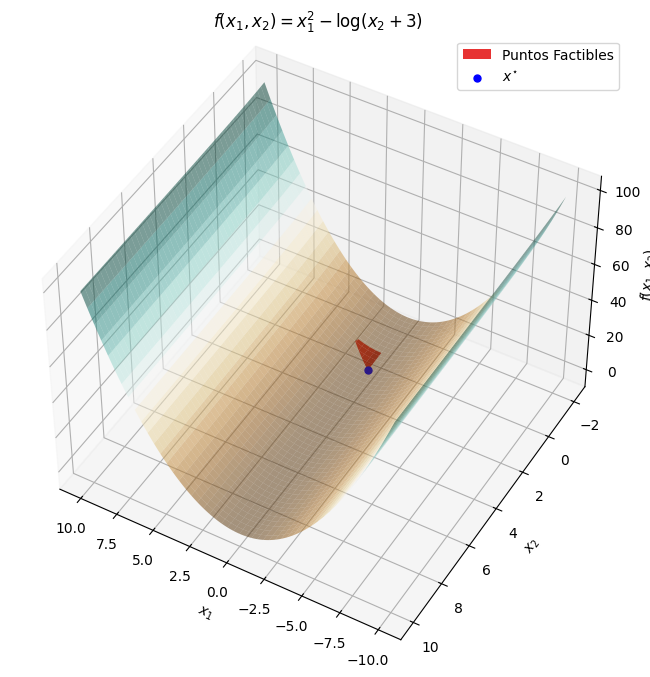

In [4]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(x1**2 - cp.log(x2 + 3))

# Definimos las Restricciones de Desigualdad

constraints = [x1 + 2*x2 - 2 <= 0, -x1 <= 0, -x2 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles 

x = np.linspace(-10, 10, 5000)
y = np.linspace(-2, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = X**2 - np.log(Y + 3)

feasible = (X + 2*Y - 2 <= 0) & (-X <= 0) & (-Y <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = x_1^2 - \log(x_2 + 3)$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

# **Formato Estandar** 

En el formato **estandar** siempre definimos el lado derecho de las **restricciones de desigualdad e igualdad** sean igual a $0$, es por esto que tratamos de hacer las transformaciones correspondientes para que esto se cumpla.

**Problema Original:** 

$$\begin{align*}
\text{minimizar} \quad & (x_{1}-2)^2 + x_{2} \\ \text{sujeto a} \quad & x_{1} + x_{2} \leq 5 \\ & x_{1} \geq 0 \\ &  x_{2} = 3
\end{align*}$$

**Problema en Formato Estandar:**

$$\begin{align*}
\text{minimizar} \quad & (x_{1}-2)^2 + x_{2} \\ \text{sujeto a} \quad & x_{1} + x_{2} - 5 \leq 0 \\ & -x_{1} \leq 0 \\ &  x_{2} - 3 = 0
\end{align*}$$

### **Problema Original**

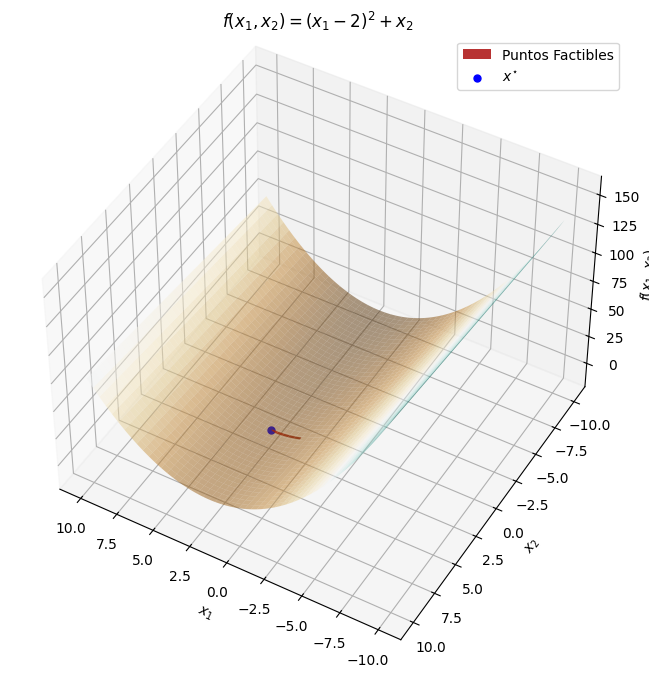

In [5]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + x2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2  <= 5, x1 >= 0, x2 == 3]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = (X - 2)**2 + Y

feasible = (X + Y <= 5) & (X >= 0) & (np.abs(Y - 3) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 2)^2 + x_{2}$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema en Formato Estandar**

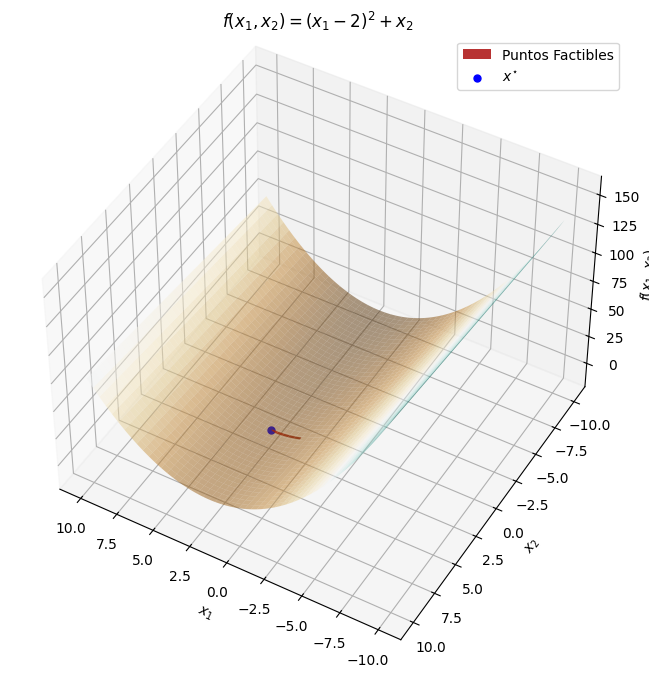

In [6]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + x2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 5 <= 0, -x1 <= 0, x2 - 3 == 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = (X - 2)**2 + Y

feasible = (X + Y - 5 <= 0) & (-X <= 0) & (np.abs(Y - 3) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 2)^2 + x_{2}$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

# **Problemas de Maximizacion** 

Encontramos la **variable de optimizacion** $x$ que **maximiza** $f_{0}(x)$ dentro de todo el conjunto de $x$ que satisafecen las funciones de **restricciones de desigualdad** $f_{i}: \mathbb{R}^n \rightarrow \mathbb{R}$ y las funciones de **restricciones de igualdad** $h_{i}: \mathbb{R}^n \rightarrow \mathbb{R}$

$$\begin{align*}
\text{maximiza} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

El **valor optimo** $p^{\star}$ del problema de optimizacion es el **supremum** del **conjunto factible** 

$$p^{\star} = \text{sup}\{f_{0}(x) \mid f_i(x) \leq 0, \hspace{0.1cm} i = 1, 2, \dots, m, \hspace{0.1cm} h_i(x) = 0, \hspace{0.1cm} i = 1, 2, \dots, p\}$$

Adicionalmente se puede plantear el **problema de maximizacion** como un **problema de minimizacion** $-f_{0}(x)$

**Problema de Maximizacion:** 

$$\begin{align*}
\text{maximizar} \quad & 5x_{1} - x_{2}^2 \\ \text{sujeto a} \quad & x_{1} + x_{2} - 5 \leq 0 \\ & -x_{1} \leq 0 \\ &  x_{2} - 3 = 0
\end{align*}$$

**Problema de Minimizacion:**

$$\begin{align*}
\text{mimimizar} \quad & x_{2}^2 - 5x_{1} \\ \text{sujeto a} \quad & x_{1} + x_{2} - 5 \leq 0 \\ & -x_{1} \leq 0 \\ &  x_{2} - 3 = 0
\end{align*}$$

### **Problema de Maximizacion**

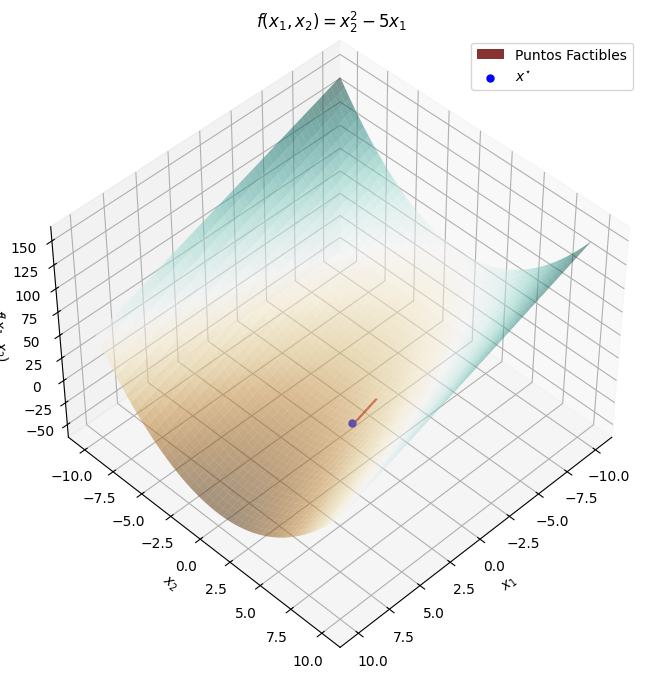

In [7]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Maximize(5*x1 - x2**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 5 <= 0, -x1 <= 0, x2 - 3 == 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = Y**2 - 5*X

feasible = (X + Y - 5 <= 0) & (-X <= 0) & (np.abs(Y - 3) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = x_{2}^2 - 5x_{1}$')
ax.view_init(elev = 45, azim = 45)

ax.legend()
plt.show()

### **Problema de Minimizacion**

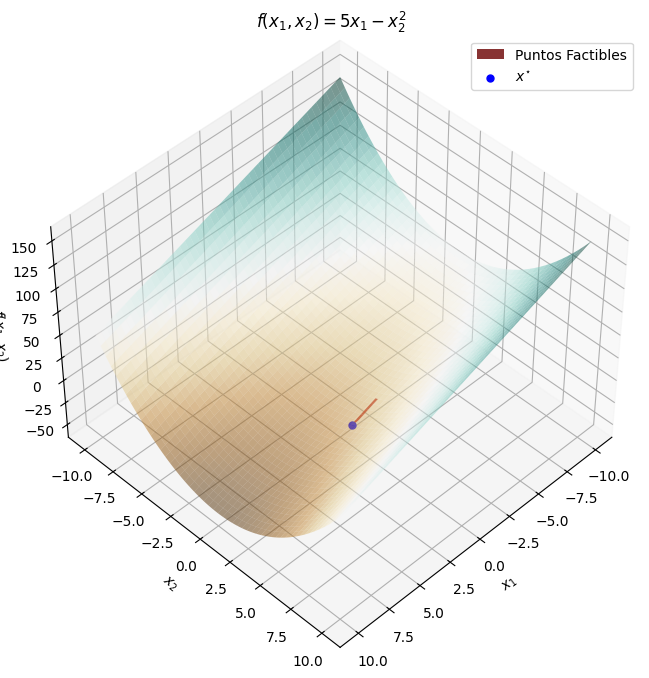

In [8]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(x2**2 - 5*x1)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 5 <= 0, -x1 <= 0, x2 - 3 == 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve()

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = Y**2 - 5*X

feasible = (X + Y - 5 <= 0) & (-X <= 0) & (np.abs(Y - 3) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = 5x_{1} - x_{2}^2$')
ax.view_init(elev = 45, azim = 45)

ax.legend()
plt.show()

# **Problemas Equivalentes**

Dos problemas de optimizacion son **equivalentes** si a partir de la **solucion de un problema** se encuentra la **solucion del otro problema** y viceversa. 

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & \alpha_{0} f_0(x) \\ \text{sujeto a} \quad & \alpha_{i} f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & \beta_{i} h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

En donde $\alpha_{i} > 0$ y $\beta_{i} \neq 0$


**Nota:** No son el mismo problema, son **equivalentes**. Lo unico que es igual es el conjunto de **puntos factibles** $X_{\text{opt}}$



**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & x_{1}^2 + 4x_{2}^2 \\ \text{sujeto a} \quad & -x_{1} \leq 0 \\ & x_{1} + x_{2} - 5 \leq 0 
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & 3 \cdot (x_{1}^2 + 4x_{2}^2) \\ \text{sujeto a} \quad & -1.5x_{1} \leq 0 \\ & 4.7 \cdot (x_{1} + x_{2} - 5) \leq 0 
\end{align*}$$

### **Problema Original**

Polishing not needed - no active set detected at optimal point


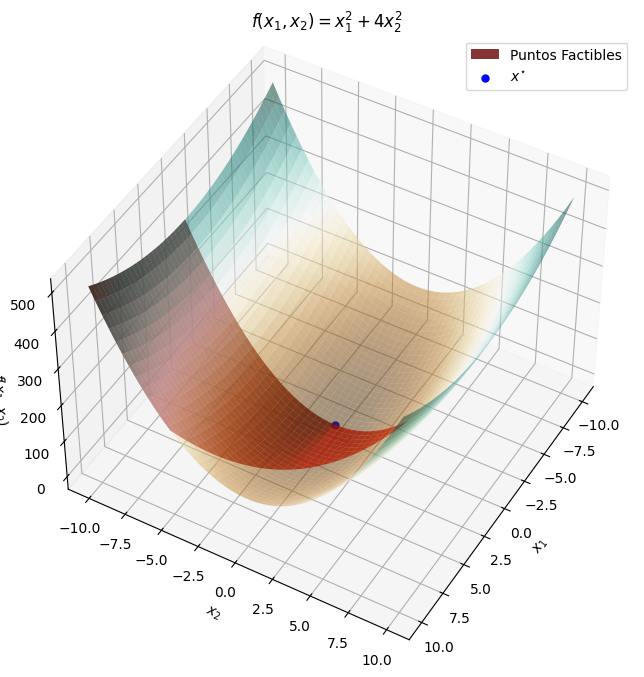

In [9]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(x1**2 + 4*x2**2)

# Definimos las Restricciones de Desigualdad

constraints = [-x1 <= 0, x1 + x2 - 5 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = X**2 + 4 * Y**2

feasible = (-X <= 0) & (X + Y - 5 <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = x_{1}^2 + 4x_{2}^2$')
ax.view_init(elev = 45, azim = 30)

ax.legend()
plt.show()

### **Problema Equivalente**

Polishing not needed - no active set detected at optimal point


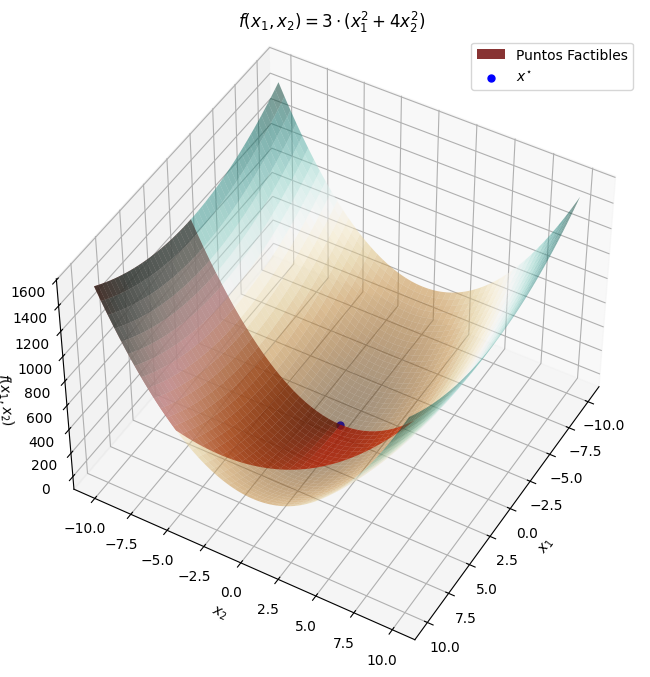

In [10]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(3 * (x1**2 + 4*x2**2))

# Definimos las Restricciones de Desigualdad

constraints = [-1.5*x1 <= 0, 4.7*(x1 + x2 - 5) <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = 3 * (X**2 + 4 * Y**2)

feasible = (-1.5*X <= 0) & (4.7*(X + Y - 5) <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = 3 \cdot (x_{1}^2 + 4x_{2}^2)$')
ax.view_init(elev = 45, azim = 30)

ax.legend()
plt.show()

# **Cambio de Variables** 

Se define una funcion **inyectiva** $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^n$ **uno a uno**, en donde la imagen cubre el **dominio** del problema original $\operatorname{D}$ 

$$\phi(\operatorname{dom} \phi) \supseteq \operatorname{D}$$

El cambio de variable consiste en expresar $x$ como una **transformacion** de una nueva variable $z$ 

$$x = \phi(z)$$

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & \tilde{f_{0}}(z) \\ \text{sujeto a} \quad &  \tilde{f_{i}}(z) \leq 0 \quad i = 1, 2, \dots, m \\ & \tilde{h_{i}}(z) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

En donde $\tilde{f_{0}}(z) = f_{0}(\phi(z))$, $\tilde{f_{i}}(z) = f_{i}(\phi(z))$ y $\tilde{h_{i}}(z) = h_{i}(\phi(z))$

**Nota:** Si $x$ resuelve el **problema original** entonces $z = \phi^{-1}(x)$ resuelve el problema **equivalente**, en cambio si $z$ resuelve el **problema equivalente** entonces $x = \phi(z)$ resuelve el **problema original**

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & x_{1}^2 + x_{2}^2 \\ \text{sujeto a} \quad & x_{1}x_{2} - 1 \geq 0 \\ & x_{1} \geq 0 \\ & x_{2} \geq 0
\end{align*}$$

**Problema Equivalente**

* Cambio de Variable: 

$$x_{1} = e^{z_{1}} \hspace{1cm} x_{2} = e^{z_{2}}$$

* Problema

$$\begin{align*}
\text{minimizar} \quad & e^{2 z_{1}} + e^{2 z_{2}} \\ \text{sujeto a} \quad & z_{1} + z_{2} \geq 0
\end{align*}$$

### **Problema Equivalente**

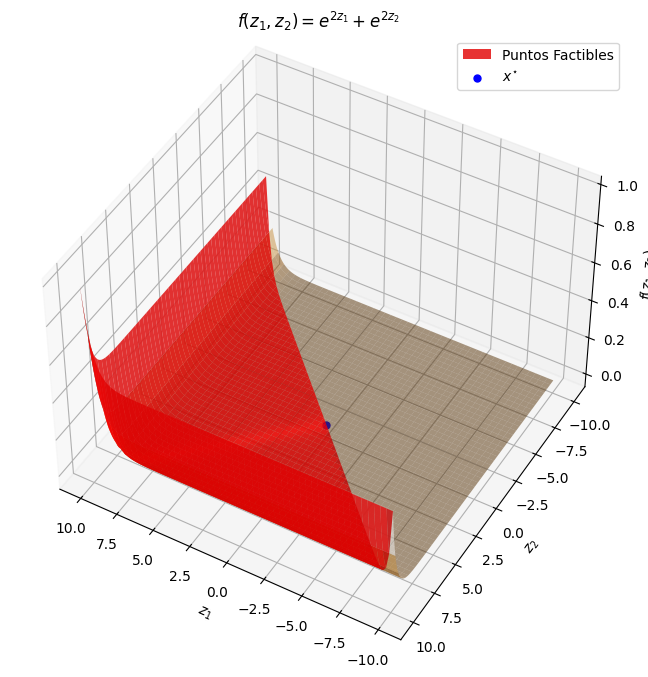

In [11]:
# Definimos las Variables

z1 = cp.Variable()
z2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(cp.exp(2 * z1) + cp.exp(2 * z2))

# Definimos las Restricciones de Desigualdad

constraints = [z1 + z2 >= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo 

opt_z1 = z1.value
opt_z2 = z2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)

Z = np.exp(2 * X) + np.exp(2 * Y)

feasible = (X + Y >= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_z1, opt_z2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$f(z_{1}, z_{2})$')
ax.set_title('$f(z_{1}, z_{2}) = e^{2z_{1}} + e^{2z_{2}}$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema Original**

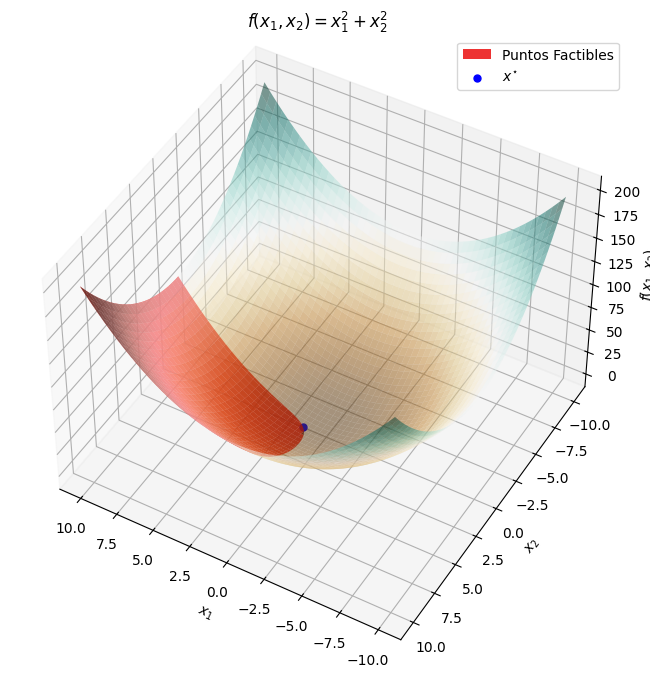

In [12]:
# Obtenemos el Valor Optimo y el Punto Optimo (Realizamos el Cambio de Variable) (No podemos optimizar el problema ya que la restriccion xy - 1, no es convexa)

opt_x1 = np.exp(opt_z1)
opt_x2 = np.exp(opt_z2)

opt_val = opt_x1**2 + opt_x2**2

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 5000)
y = np.linspace(-10, 10, 5000)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

feasible = ((X * Y) - 1 >= 0) & (X >= 0) & (Y >= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = x_{1}^2 + x_{2}^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

# **Variables de Holgura** 

Dada una **restriccion de desigualdad** $f_{i} \leq 0$, sabemos que puede ser **equivalente** a la cantidad por la cual **no se cumple la desigualdad** $s_{i}$ 

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & f_{0}(x) \\ \text{sujeto a} \quad & s_{i} \geq 0 \quad i = 1, 2, \dots, m \\ &  f_{i}(x) + s_{i} = 0 \quad i = 1, 2, \dots, m \\ & h_{i}(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

En donde ahora las variables del problema son $x \in \mathbb{R}^n$ y $s \in  \mathbb{R}^m$, $s_{i}$ es la **variable de holgura**

**Nota:** Esta equivalencia no cambia ni el **conjunto factible** ni la **solucion optima** 

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 1)^2 + (x_{2} - 2)^2\\ \text{sujeto a} \quad & x_{1} + 2x_{2} - 4 \leq 0 \\ & x_{1} \geq 0 \\ & x_{2} \geq 0
\end{align*}$$

**Problema Equivalente**

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 1)^2 + (x_{2} - 2)^2\\ \text{sujeto a} \quad & x_{1} + 2x_{2} - 4 + s_{1} = 0 \\ & x_{1} \geq 0 \\ & x_{2} \geq 0 \\ & s_{1} \geq 0 
\end{align*}$$

### **Problema Original**

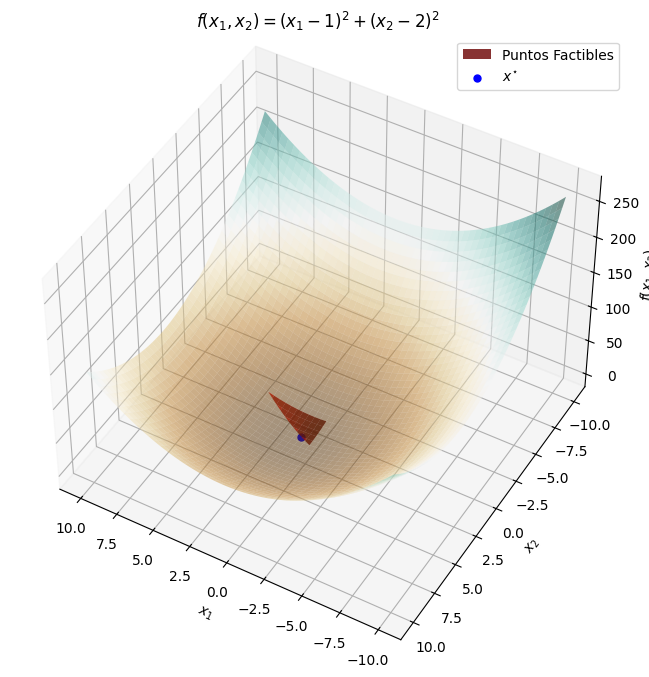

In [13]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 1)**2 + (x2 - 2)**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + 2*x2 - 4 <= 0, -x1 <= 0, -x2 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)

Z = (X - 1)**2 + (Y - 2)**2

feasible = (X + 2*Y - 4 <= 0) & (X >= 0) & (Y >= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 1)^2 + (x_{2} - 2)^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema Equivalente**

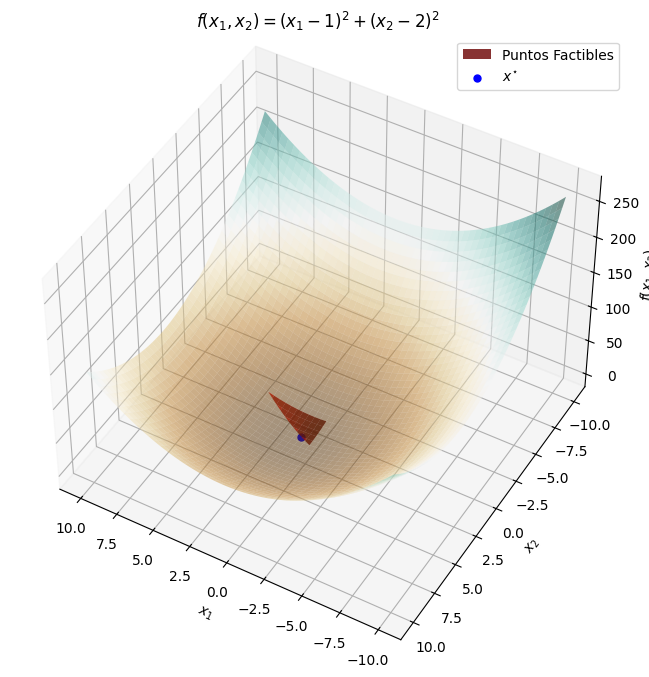

In [14]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()
s1 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 1)**2 + (x2 - 2)**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + 2*x2 - 4 + s1 == 0, -x1 <= 0, -x2 <= 0, -s1 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)
S = 4 - X - 2*Y 

Z = (X - 1)**2 + (Y - 2)**2

feasible = (np.abs(X + 2*Y - 4 + S) < 0.1) & (X >= 0) & (Y >= 0) & (S >= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 1)^2 + (x_{2} - 2)^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

# **Eliminacion de Restricciones de Igualdad**

Podemos parametrizar el conjunto solucion de las **restricciones de igualdad** usando un parametro $z \in \mathbb{R}^k$ y definiendo una funcion $\phi: \mathbb{R}^k \rightarrow \mathbb{R}^n$

$$x = \phi(z)$$

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & \tilde{f_{0}}(z) \\ \text{sujeto a} \quad &  \tilde{f_{i}}(z) \leq 0 \quad i = 1, 2, \dots, m
\end{align*}$$

En donde $\tilde{f_{0}}(z) = f_{0}(\phi(z))$, $\tilde{f_{i}}(z) = f_{i}(\phi(z))$

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 1)^2 + (x_{2} - 2)^2\\ \text{sujeto a} \quad & x_{1} + x_{2} = 4 \\ & x_{1} \leq 0
\end{align*}$$

**Problema Equivalente** 

* Eliminamos las Restricciones de Igualdad 

$$x_{1} + x_{2} = 4 \hspace{1cm} x_{2} = 4 - x_{1}$$

$$x = \phi(z) = \begin{bmatrix}
           z \\
           4 - z \\
         \end{bmatrix}$$

* Problema

$$\begin{align*}
\text{minimizar} \quad & (z - 1)^2 + (2 - z)^2 \\ & z \leq 0
\end{align*}$$


### **Problema Original**

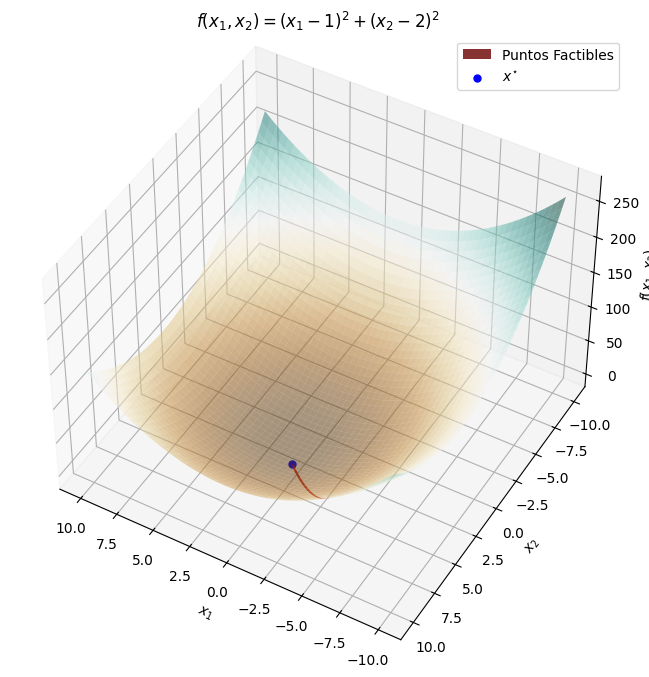

In [15]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 1)**2 + (x2 - 2)**2)

# Definimos las Restricciones de Desigualdad

constraints = [x1 + x2 - 4 == 0, x1 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)

Z = (X - 1)**2 + (Y - 2)**2

feasible = (np.abs(X + Y - 4) < 0.1) & (X <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 1)^2 + (x_{2} - 2)^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema Equivalente**

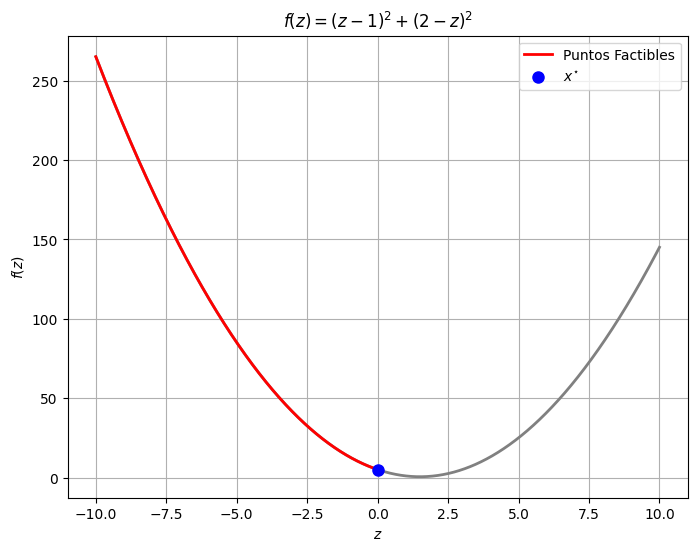

In [16]:
# Definimos las Variables

z = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((z - 1)**2 + (2 - z)**2)

# Definimos las Restricciones de Desigualdad

constraints = [z <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_z = z.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)

y = (x - 1)**2 + (2 - x)**2

feasible = (x <= 0)

# Visualizamos 

fig = plt.figure(figsize = (8, 6))

plt.plot(x, y, color = 'gray', linewidth = 2)
plt.plot(x[feasible], y[feasible], color = 'red', linewidth = 2, label = 'Puntos Factibles')
plt.plot(opt_z, opt_val, 'bo', label = '$x^{\\star}$', markersize = 8)

plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.title('$f(z) = (z - 1)^2 + (2 - z)^2$')
plt.grid(True)
plt.legend()

plt.show()

# **Eliminacion de Restricciones Lineales de Igualdad** 

Cuando todas las **restricciones de igualdad** son **lineales** $Ax = b$, podemos remplazarla por una forma **afin**

$$x = x_{0} + Fz$$

En donde $x_{0} \in \mathbb{R}^n$ es una **solucion particular**, $F \in \mathbb{R}^{n \times k }$ sus columnas forman una base del **nucleo** de $A$, $\operatorname{N}(A) = \{x \mid Ax = 0\}$ Y $z \in \mathbb{R}^k$ donde $k = n - \text{rank}(A)$

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & f_{0}(x_{0} + Fz) \\ \text{sujeto a} \quad &  f_{i}(x_{0} + Fz) \leq 0 \quad i = 1, 2, \dots, m
\end{align*}$$


**Nota:** Esta equivalencia nos da un **problema** con una menor **dimensionalidad** 

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 1)^2 + (x_{2} - 2)^2 + (x_{3} - 3)^2\\ \text{sujeto a} \quad & x_{1} + x_{2} + x_{3} - 4 = 0 \\ & x_{1} - x_{3} - 1 = 0 \\ & x_{2} - 1 \leq 0
\end{align*}$$

**Problema Equivalente**

* Encontramos una Solucion Particular para las restricciones de igualdad $x_{0}$ 

$$x_{0} = \begin{bmatrix}
           1 \\
           3 \\
           0
         \end{bmatrix}$$

* Obtenemos la Base del Nucleo $Ax = 0$

$$A = \begin{bmatrix}
           1 & 1 & 1 \\
           1 & 0 & -1 
         \end{bmatrix}$$

$$x_{0} = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3}
         \end{bmatrix}$$

$$x = \begin{bmatrix}
           x_{1} \\
           -2 x_{1} \\
           x_{1}
         \end{bmatrix}$$

$$F = t \begin{bmatrix}
           1 \\
           -2 \\
           1
         \end{bmatrix}$$

* Eliminamos las Restricciones de Igualdad


$$x = x_{0} + Fz$$

$$x = \begin{bmatrix}
           1 \\
           3 \\
           0
         \end{bmatrix} + \begin{bmatrix}
           1 \\
           -2 \\
           1
         \end{bmatrix} z$$

$$x = \begin{bmatrix}
           1 + z \\
           3 - 2z \\
           z
         \end{bmatrix}$$


* Problema

$$\begin{align*}
\text{minimizar} \quad & z^2 + (1 - 2z)^2 + (z - 3)^2 \\ & -z + 1 \leq 0
\end{align*}$$

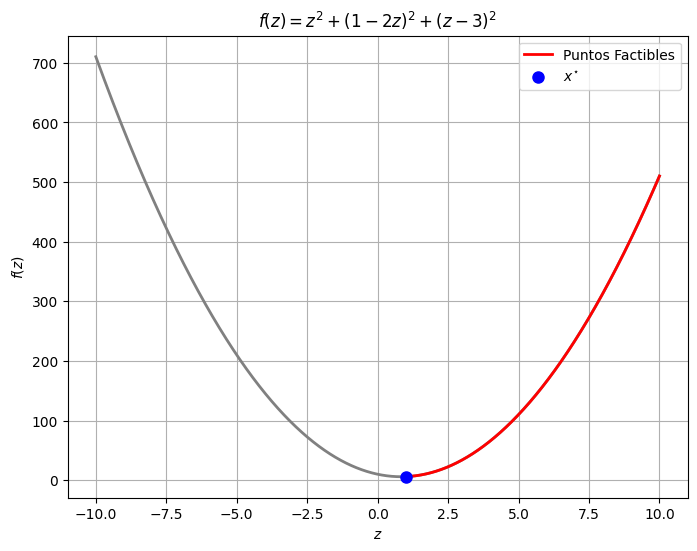

In [17]:
# Definimos las Variables

z = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(z**2 + (1 - 2*z)**2 + (z - 3)**2)

# Definimos las Restricciones de Desigualdad

constraints = [-z + 1 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)


# Obtenemos el Valor Optimo y el Punto Optimo

opt_z = z.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)

y = x**2 + (1 - 2*x)**2 + (x - 3)**2

feasible = (-x + 1 <= 0)

# Visualizamos 

fig = plt.figure(figsize = (8, 6))

plt.plot(x, y, color = 'gray', linewidth = 2)
plt.plot(x[feasible], y[feasible], color = 'red', linewidth = 2, label = 'Puntos Factibles')
plt.plot(opt_z, opt_val, 'bo', label = '$x^{\\star}$', markersize = 8)

plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.title('$f(z) = z^2 + (1 - 2z)^2 + (z - 3)^2$')
plt.grid(True)
plt.legend()

plt.show()


# **Introduccion de Restricciones de Igualdad** 

Podemos añadir **restricciones de igualdad** y **nuevas variables** esto se demuestra en este ejemplo un poco distinto al **problema general tipico** 

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(A_{0}x + b_{0}) \\ \text{sujeto a} \quad & f_i(A_{i}x + b_{i}) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

En donde $x \in \mathbb{R}^n, \hspace{0.1cm} A_{i} \in \mathbb{R}^{k_{i} \times n}$ y $f_{i}: \mathbb{R}^{k_{i}} \rightarrow \mathbb{R}$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & f_{0}(y_{0}) \\ \text{sujeto a} \quad &  f_{i}(y_{i}) \leq 0 \quad i = 1, 2, \dots, m \\ & y_{i }= A_{i} x + b_{i} \quad i = 0, 1, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

Introducimos **nuevas variables** $y_{0} \in \mathbb{R}^{k_{0}}, \hspace{0.05cm} \dots \hspace{0.05cm}, y_{m} \in \mathbb{R}^{k_{m}}$ donde no son mas que las nuevas restricciones $y_{0} = A_{0}x + b_{0}, \hspace{0.05cm} \dots \hspace{0.05cm}, y_{m} = A_{m}x + b_{m}$

**Nota:** La **funcion objetivo** y las **restricciones de desigualdad** son **independientes**

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & ||A_0x + b_0||_2^2 \\ \text{sujeto a} \quad & ||A_1x + b_1||_2  \leq 3\\ & c^T x = 1
\end{align*}$$

**Problema Equivalente** 

* Introducimos las Nuevas Variables

$$y_0 = A_0x + b_0 \hspace{1cm} y_1 = A_1x + b_1$$

* Problema

$$\begin{align*}
\text{minimizar} \quad & ||y_0||_2^2 \\ \text{sujeto a} \quad & ||y_1||_2  \leq 3 \\ & c^T x = 1 \\ & y_0 = A_0x + b_0 \\ & y_1 = A_1x + b_1
\end{align*}$$

### **Problema Original**

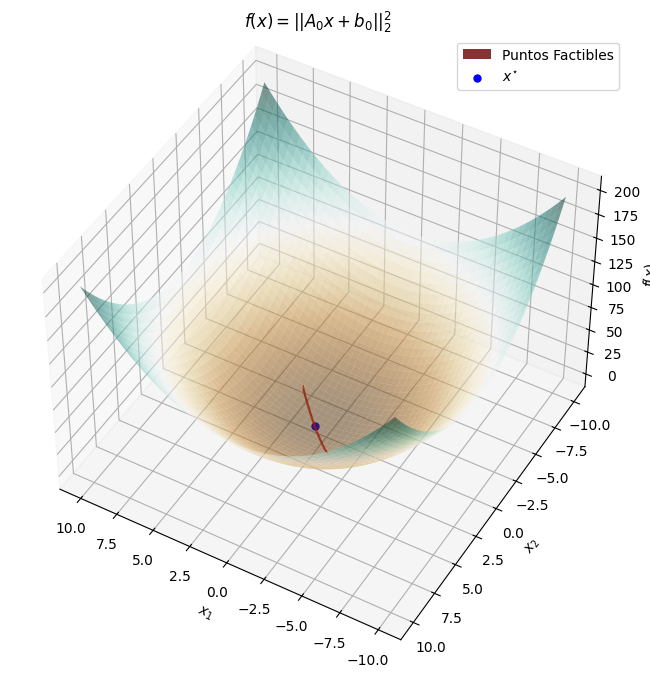

In [18]:
# Definimos las Variables

x = cp.Variable(2)

A_0 = np.array([[1, 0], [0, 1]])
A_1 = np.array([[1, 0], [0, 1]])

b_0 = np.array([0, 0])
b_1 = np.array([0, 0]) 

c = np.array([1, 1])

# Definimos la Funcion Objetivo

objective = cp.Minimize(cp.sum_squares(A_0 @ x + b_0))

# Definimos las Restricciones de Desigualdad

constraints = [cp.norm(A_1 @ x + b_1) <= 3, c.T @ x - 1 == 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x = x.value
opt_x1 = opt_x[0]
opt_x2 = opt_x[1]

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

feasible = ((X**2 + Y**2) <= 9) & (np.abs(X + Y - 1) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
ax.set_title('$f(x) = ||A_0x + b_0||_2^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema Equivalente**

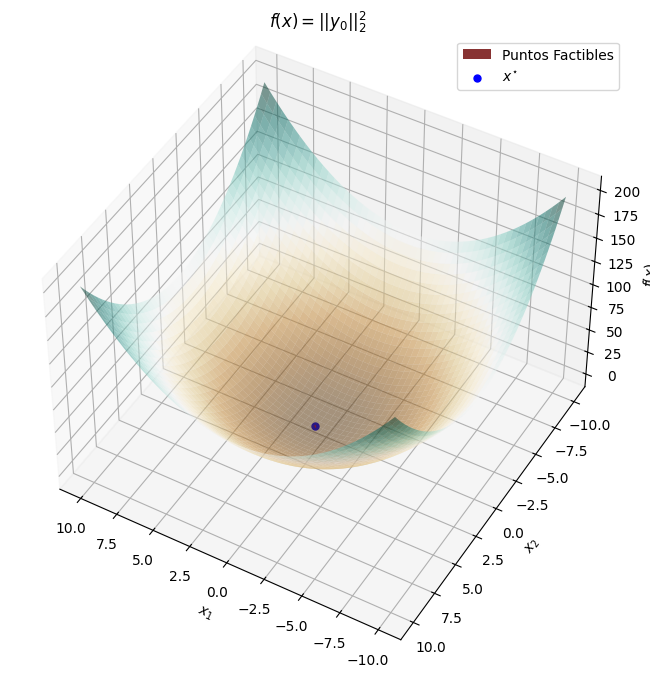

In [19]:
# Definimos las Variables

x = cp.Variable(2)
y_0 = cp.Variable(2)
y_1 = cp.Variable(2)

A_0 = np.array([[1, 0], [0, 1]])
A_1 = np.array([[1, 0], [0, 1]])

b_0 = np.array([0, 0])
b_1 = np.array([0, 0]) 

c = np.array([1, 1])

# Definimos la Funcion Objetivo

objective = cp.Minimize(cp.sum_squares(y_0))

# Definimos las Restricciones de Desigualdad

constraints = [cp.norm(y_1) <= 3, A_0 @ x + b_0 == y_0, A_1 @ x + b_1 == y_1 , c.T @ x - 1 == 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_y = y_0.value
opt_y1 = opt_y[0]
opt_y2 = opt_y[1]

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x_mesh = np.linspace(-10, 10, 10000)
y_mesh = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x_mesh, y_mesh)

Z = X**2 + Y**2

feasible = ((X**2 + Y**2) <= 9) & (np.abs(X + Y - 1) < 0.1) & (np.abs(X - y_0.value[0]) < 0.1) & (np.abs(Y - y_0.value[1]) < 0.1) & (np.abs(X - y_1.value[0]) < 0.1) & (np.abs(Y - y_1.value[1]) < 0.1)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
ax.set_title('$f(x) = ||y_0||_2^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

# **Optimizacion Parcial** 

Siempre podemos **minimizar** una funcion donde ya se ha **minimizado** sobre una variable para luego seguir **minimizando** sobre las variables que quedan 

$$\text{inf}_{x, y} f(x, y) = \text{inf}_{x} (\text{inf}_{y} f(x, y)) = \text{inf}_{x} \tilde{f}(x)$$

En donde $\tilde{f}(x) = \text{inf}_{y} f(x, y)$

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x_{1}, x_{2}) \\ \text{sujeto a} \quad & f_i(x_{1}) \leq 0 \quad i = 1, 2, \dots, m_{1} \\ & \tilde{f_i}(x_{2}) \leq 0 \quad i = 1, 2, \dots, m_{2}
\end{align*}$$

En donde $x \in \mathbb{R}^n$ esta por partes $x = (x_{1}, x_{2})$ en donde $x \in \mathbb{R}^{n_{1}}$ y $x \in \mathbb{R}^{n_{2}}$ con $n_{1} + n_{2} = n$. Las **restricciones de desigualdad** entre si, son **independientes** la funcion depende de $x_{1}$ o de $x_{2}$ pero **no ambas** a la vez


**Problema Equivalente** 

$$\tilde{f_{0}}(x_{1}) = \text{inf}_{x_{2}}\{f_{0}(x_{1}, x_{2}) \mid \tilde{f_i}(x_{2}) \leq 0 \quad i = 1, 2, \dots, m_{2}\}$$

$$\begin{align*}
\text{minimizar} \quad & \tilde{f_{0}}(x_{1}) \\ \text{sujeto a} \quad &  f_i(x_{1}) \leq 0 \quad i = 1, 2, \dots, m_{1}
\end{align*}$$

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 2)^2 + (x_{2} - 1)^2\\ \text{sujeto a} \quad & -x_{1} \leq 0\\ & x_{2} - 0.5 \leq 0
\end{align*}$$

**Problema Equivalente** 

* Calculamos el Minimo Global con respecto un Variable $x_2$


$$\tilde{f_{0}}(x_{1}) = \text{inf}_{x_{2}}\{(x_{1} - 2)^2 + (x_{2} - 1)^2 \mid x_{2} - 0.5 \leq 0\}$$

* Sustituimos con el Valor Optimo 

$$x_2^* = 0.5 \hspace{2cm} (x_2^* - 1)^2 = (0.5 - 1)^2 = 0.25$$


* Problema

$$\begin{align*}
\text{minimizar} \quad & \tilde{f_{0}}(x_{1}) \\ & -x_{1} \leq 0
\end{align*}$$

$$\begin{align*}
\text{minimizar} \quad & (x_{1} - 2)^2 + 0.25 \\ & -x_{1} \leq 0
\end{align*}$$

### **Problema Original**

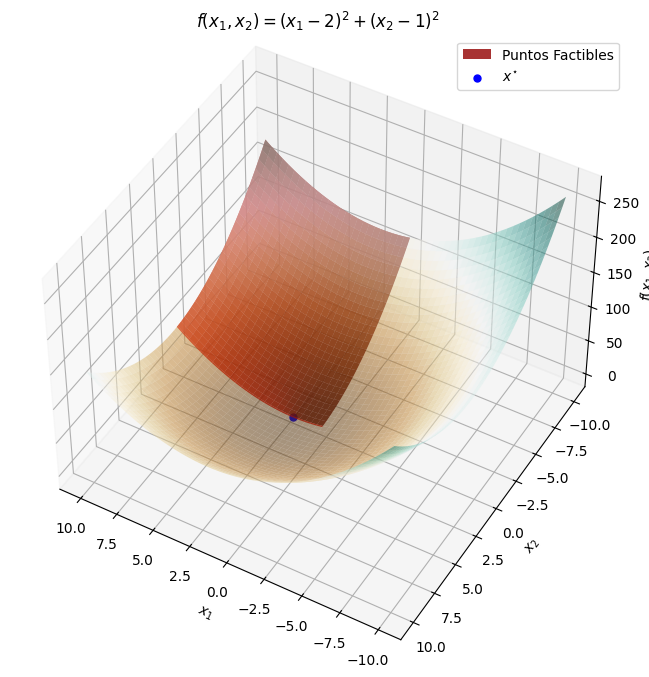

In [20]:
# Definimos las Variables

x1 = cp.Variable()
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + (x2 - 1)**2)

# Definimos las Restricciones de Desigualdad

constraints = [-x1 <= 0, x2 - 0.5 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value
opt_x2 = x2.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles (Para los Puntos Factibles como tenemos una Malla, la igualdad la convertimos en una desigualdad para poder la zona factible)

x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)

Z = (X - 2)**2 + (Y - 1 )**2

feasible = (-X <= 0) & (Y - 0.5 <= 0)
Z_feasible = np.where(feasible, Z, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, Y, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x1, opt_x2, opt_val, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_{1}, x_{2})$')
ax.set_title('$f(x_{1}, x_{2}) = (x_{1} - 2)^2 + (x_{2} - 1)^2$')
ax.view_init(elev = 45, azim = 120)

ax.legend()
plt.show()

### **Problema Equivalente**

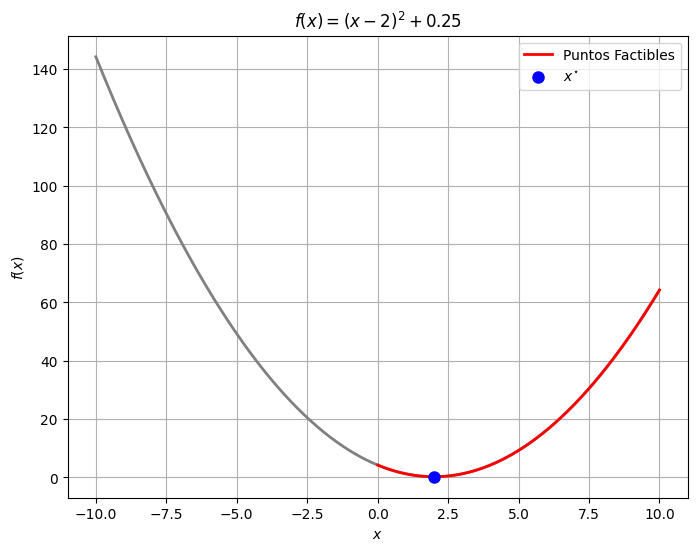

In [21]:
# Definimos las Variables (Definimos una Variable Fija, por la que no estamos minimizando)

x1 = 0
x2 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + (x2 - 1)**2)

# Definimos las Restricciones de Desigualdad

constraints = [x2 - 0.5 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x2 = x2.value

opt_val = prob.value

# Definimos las Variables (Definimos una Variable de la Nueva Funcion)

x1 = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x1 - 2)**2 + 0.25)

# Definimos las Restricciones de Desigualdad

constraints = [-x1 <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x1 = x1.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)

y = (x - 2)**2 + 0.25

feasible = (-x <= 0)

# Visualizamos 

fig = plt.figure(figsize = (8, 6))

plt.plot(x, y, color = 'gray', linewidth = 2)
plt.plot(x[feasible], y[feasible], color = 'red', linewidth = 2, label = 'Puntos Factibles')
plt.plot(opt_x1, opt_val, 'bo', label = '$x^{\\star}$', markersize = 8)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$f(x) = (x - 2)^2 + 0.25$')
plt.grid(True)
plt.legend()

plt.show()

# **Forma Epigrafica** 

La **funcion objetivo** de la **forma epigrafica** es una **funcion lineal** de las variables $x, t$. $(x, t)$ es **optimo** para el **problema equivalente** si y solo si, $x$ es **optimo** para el **problema original** $t = f_0(x)$

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & t \\ \text{sujeto a} \quad & f_0(x) - t \leq 0 \\ &  f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

En donde $x \in \mathbb{R}^n$ y $t \in \mathbb{R}$

**Nota:** Optimizamos sobre el **espacio del grafico**. Minimizar $f_0$ es lo mismo que **buscar el punto mas bajo en el epigrafe de $f_0$**

**Problema Original**

$$\begin{align*}
\text{minimizar} \quad & (x - 2)^2\\ \text{sujeto a} \quad & -x \leq 0
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & t \\ & (x - 2)^2 - t \leq 0 \\ & -x \leq 0
\end{align*}$$

### **Problema Original**

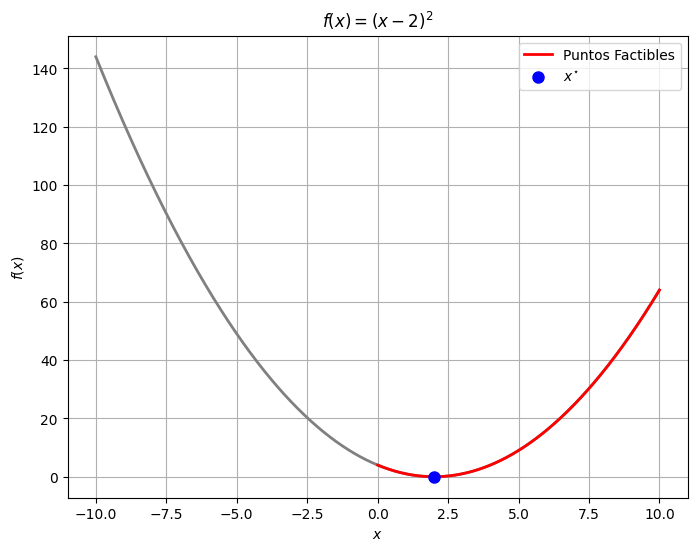

In [22]:
# Definimos las Variables

x = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize((x - 2)**2)

# Definimos las Restricciones de Desigualdad

constraints = [-x <= 0] 

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x = x.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles

x = np.linspace(-10, 10, 10000)

y = (x - 2)**2

feasible = (-x <= 0)

# Visualizamos 

fig = plt.figure(figsize = (8, 6))

plt.plot(x, y, color = 'gray', linewidth = 2)
plt.plot(x[feasible], y[feasible], color = 'red', linewidth = 2, label = 'Puntos Factibles')
plt.plot(opt_x, opt_val, 'bo', label = '$x^{\\star}$', markersize = 8)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$f(x) = (x - 2)^2$')
plt.grid(True)
plt.legend()

plt.show()

### **Problema Equivalente**

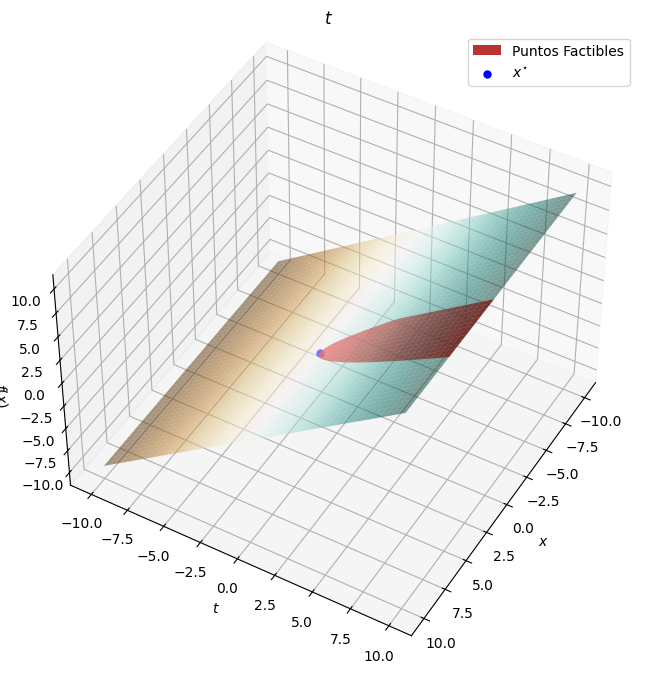

In [23]:
# Definimos las Variables

x = cp.Variable()
t = cp.Variable()

# Definimos la Funcion Objetivo

objective = cp.Minimize(t)

# Definimos las Restricciones de Desigualdad

constraints = [(x - 2)**2 - t <= 0, -x <= 0]

# Construimos y Resolvemos el Problema

prob = cp.Problem(objective, constraints)
prob.solve(verbose = False)

# Obtenemos el Valor Optimo y el Punto Optimo

opt_x = x.value
opt_t = t.value

opt_val = prob.value

# Obtenemos el Conjunto de Puntos Factibles 

x = np.linspace(-10, 10, 10000)
t = np.linspace(-10, 10, 10000)

X, T = np.meshgrid(x, t)

feasible = (-X <= 0) & ((X - 2)**2 - T <= 0)
Z_feasible = np.where(feasible, T, np.nan)

# Visualizamos 

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, T, T, cmap = 'BrBG', alpha = 0.5, edgecolor = 'none')
ax.plot_surface(X, T, Z_feasible, color = 'red', alpha = 0.8, label = 'Puntos Factibles')
scatter = ax.scatter(opt_x, opt_t, opt_t, color = 'blue', s = 25, label = '$x^{\\star}$')

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$f(x)$')
ax.set_title('$t$')
ax.view_init(elev = 45, azim = 30)

ax.legend()
plt.show()

# **Restricciones Implicitas e Explicitas**

Debido a que tenemos la capacidad de convertir las **funciones** en **funciones extendidas** podemos definir cualquier **restriccion de desigualdad o igualdad** implicitamente en la **funcion objetivo**, **redefiniendo el dominio**

**Problema Original** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x) \\ \text{sujeto a} \quad & f_i(x) \leq 0 \quad i = 1, 2, \dots, m \\ & h_i(x) = 0 \quad i = 1, 2, \dots, p
\end{align*}$$

**Problema Equivalente** 

$$\begin{align*}
\text{minimizar} \quad & f_0(x)
\end{align*}$$

Restringimos el **dominio** de la **funcion objetivo**  $$\operatorname{dom} f_0 = \{x \in\operatorname{dom} f_0 \mid f_i(x) \leq 0, \hspace{0.1cm} i = 1, 2, \dots, m, \hspace{0.1cm} h_i(x) = 0, \hspace{0.1cm} i = 1, 2, \dots, p \}$$

De manera equivalente tambien podemos definir **restricciones de desigualdad o igualdad** explicitamente **redefiniendo el problema**

**Nota:** Esta equivalencia no hace que el problema sea mas facil de **resolver** o **analizar**. En ambos caso los problemas son **distintos** pero son **equivalentes**

